In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load all CSV files

Dfs = []

COLUMN_RENAMING = {
    
    'Country or region': 'country',
    'Region': 'region',
    
    'Happiness Rank': 'happiness_rank',
    'Happiness.Rank': 'happiness_rank',
    'Happiness Score': 'happiness_score',
    'Happiness.Score': 'happiness_score',
    'Score': 'happiness_score',
    
    'gdp_per_capita': 'gdp_per_capita',
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'GDP per capita': 'gdp_per_capita',   
    'Family': 'social_support',
    'social_support': 'social_support',
    'Health (Life Expectancy)': 'life_expectancy',
    'Health..Life.Expectancy.': 'life_expectancy',
    'life_expectancy': 'life_expectancy', 

    'Freedom': 'freedom',
    'Freedom to make life choices': 'freedom',
    'Trust (Government Corruption)': 'corruption',
    'Trust..Government.Corruption.': 'corruption',
    'Perceptions of corruption': 'corruption',
    'Generosity': 'generosity',
    'Dystopia Residual': 'dystopia_residual',
    'Dystopia.Residual': 'dystopia_residual',
    'year': 'year'
}

for year in range(2015, 2020):
    file_path = f"../data/raw/{year}.csv"

    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            df = df.rename(columns=COLUMN_RENAMING)   #Corrigindo erro de dados divergentes por nome de coluna divergente entre as planilhas
            df['year'] = year  # Coluna com os anos do dataset
            Dfs.append(df)
        except:

            print(f"Warning: {file_path} not found. Skipping.")

# Combine all DataFrames into one
combined_df = pd.concat(Dfs, axis=0, ignore_index=True)
#print(combined_df)


In [3]:
combined_df.columns = combined_df.columns.str.lower().str.replace(' ', '_')  # substitui espaço em branco por underline nos nomes das colunas
print(combined_df.isnull().sum())


country                      312
region                       467
happiness_rank               312
happiness_score                0
standard_error               624
gdp_per_capita                 0
social_support               312
life_expectancy              312
freedom                        0
corruption                     1
generosity                     0
dystopia_residual            312
year                           0
lower_confidence_interval    625
upper_confidence_interval    625
whisker.high                 627
whisker.low                  627
overall_rank                 470
country                      470
social_support               470
healthy_life_expectancy      470
dtype: int64


In [4]:
# Drop columns with >30% missing data
newSize = len(combined_df) * 0.7
combined_df = combined_df.dropna(thresh=newSize, axis=1) #remove colunas com exceço de missing values 

# Fill remaining missing values (e.g., with median)
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()  #seleciona dtypes do tipo numérico (numpy number)
# e extrai o nome das colunas com o dtype selecionado
combined_df.loc[:, numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].median())  #preence as linhas de missing values com as medians das colunas do tipo np.number

#print(combined_df)

#após tratado, gera o csv

combined_df.to_csv('../data/processed/Felicidade_data_tradado.csv', index=False)


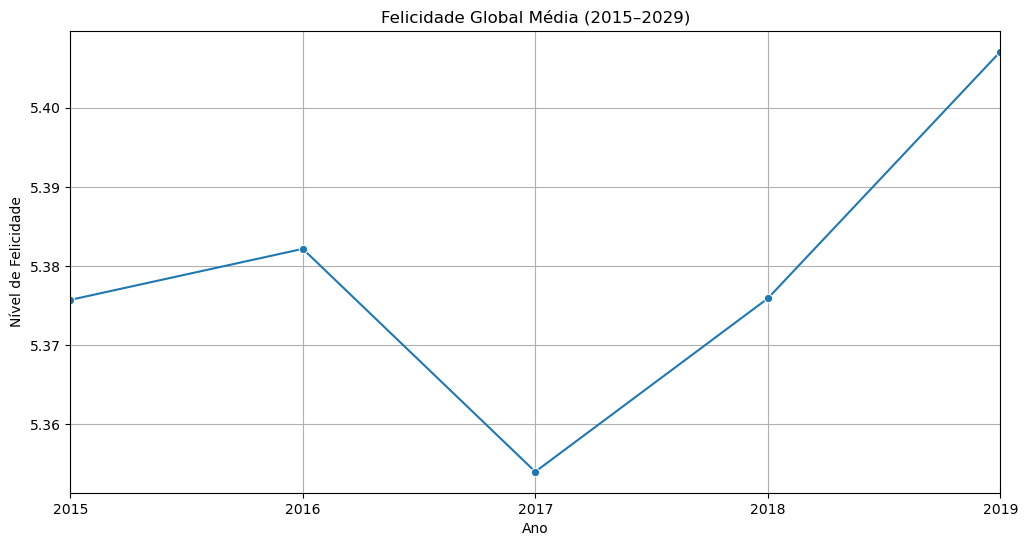

In [43]:
#1º Gráfico: Felicidade Média Global por ano
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='year', 
    y='happiness_score', 
    data=combined_df.groupby('year')['happiness_score'].mean().reset_index(),
    marker='o'
)

plt.xticks(range(2015,2020))
plt.xlim(2015,2019)
plt.title('Felicidade Global Média (2015–2029)')
plt.xlabel('Ano')
plt.ylabel('Nível de Felicidade')
plt.grid(True)
plt.savefig('../reports/felicidade_global_media.png')
plt.show()

In [59]:
#2º Gráfico: Top 10 Países Mais Felizes (2019)
top_2019 = combined_df[combined_df['year'] == 2019].nlargest(10, 'happiness_score')
# Plot
'''
verificar erro!!!!
plt.figure(figsize=(12, 6))
sns.barplot(x='happiness_score', y='country', data=top_2019, palette='viridis')
plt.title('Top 10 Países Mais Felizes (2019)')
plt.xlabel('Nível de Felicidade')
plt.ylabel('País')
plt.savefig('../reports/top10_2019.png')
plt.show()
'''

ValueError: Could not interpret value `country` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>